In [1]:
import pandas as pd

# 加载训练数据
train_df = pd.read_csv('./data/used_car_train_20200313.csv', sep=' ')

# 计算regDate和creatDate的中位数日期
for col in ['regDate', 'creatDate']:
    # 转换为字符串并过滤无效日期
    train_df[col] = train_df[col].astype(str)
    invalid_mask = (train_df[col].str.len() != 8) | (train_df[col].str.contains(r'\D'))
    
    # 计算有效日期的中位数
    median_date = train_df.loc[~invalid_mask, col].astype(int).median()
    median_date = str(int(median_date))
    
    print(f'{col}的中位数日期是: {median_date}')

regDate的中位数日期是: 20030912
creatDate的中位数日期是: 20160321


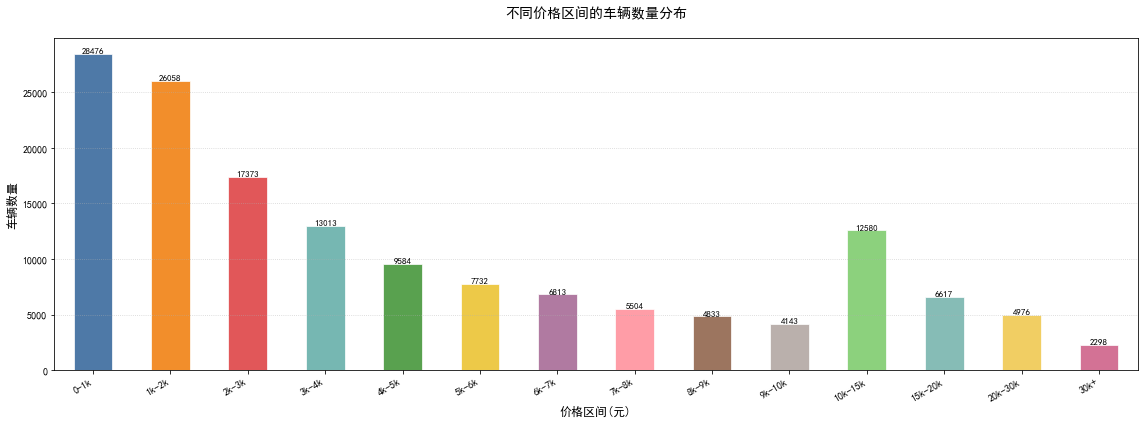

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 加载数据
df = pd.read_csv('./data/used_car_train_20200313.csv', sep=' ')

# 创建更细分的低价区间，合并高价区间
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 30000, float('inf')]
labels = ['0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k', '8k-9k', '9k-10k', '10k-15k', '15k-20k', '20k-30k', '30k+']

# 按价格区间分组
df['price_group'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
price_counts = df['price_group'].value_counts().sort_index()

# 绘制柱状图
plt.figure(figsize=(16, 6))
price_counts.plot(kind='bar', 
                 color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', 
                        '#edc948', '#b07aa1', '#ff9da7', '#9c755f', '#bab0ac',
                        '#8cd17d', '#86bcb6', '#f1ce63', '#d37295'],
                 edgecolor='white', linewidth=0.7)
plt.title('不同价格区间的车辆数量分布', fontsize=14, pad=20)
plt.xlabel('价格区间(元)', fontsize=12)
plt.ylabel('车辆数量', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle=':', alpha=0.6)

# 添加数据标签
for i, v in enumerate(price_counts):
    plt.text(i, v + 50, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()